## k-means

Lot of data are unlabeled/unannoted. In unsupervised learning there are no labels, which makes it more subjective.
Annoting costs money and time, which is not always available, hence, introducing unlabeled ML.

-> Clustering

ex.
- shopping groups
    - finding patterns based on behavior in available data

Clustering groups together, with help from domainexpert.
    - maybe it's the shopping pattern of a family

- movie groups
- anomaly detection
- color quantization
    - reduce colors to quantize visual data

# k-means clustering

1. chose k clusters
2. randomize k cluster centers
3. closest points are classified as cluster centers class
    - ex. k = 5, labes = {0,1,2,3,4}
4. calculate new cluster center
5. repeat 3-4 until no new classes change

We have some data points.

k = 3 <=> Create three random cluster centers within the data points. Let's call them class X, class Delta, and class Plus.

The points closest to X will become part of class X, and so on for every class.

Now, we recalculate the closest points:
--> ... -->

If the cluster centers are changed, new points are classified until we don't get any more class changes. By then, our data is clustered.

### How to chose K?

- Measure SSD (sum of squared distance) to cluster center

--> Create elbow plot, look for rate of decline

can also combine silhouette plot with elbowplot, which measures how tight the clusters are

--> combine with domain expertise to find if clusters are reasonable/corresponds to real labels/groups and label them

## Synthetic clusterdata with labels (removing labels later on)

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

make_blobs(500, centers=4)

(array([[  6.90912835,  -4.82452922],
        [ -7.29934423,  -6.55778567],
        [ -7.90802067,  -5.88367396],
        [ -6.27679043,  -6.43263385],
        [ 10.33441048,   9.00255121],
        [  9.04440787,  -5.5041229 ],
        [  6.72665713,  -7.88286328],
        [ -6.60751711,  -3.66535119],
        [ -9.56239941,  -5.71079386],
        [  7.43874463,   8.51404039],
        [ 11.26654915,   8.85415198],
        [ -8.35549164,  -6.53795442],
        [  9.02525447,   9.004514  ],
        [  7.49727821,  -4.76897753],
        [ -8.38523358,  -3.74221676],
        [  6.93528737,  -4.30530812],
        [ -7.34247867,  -5.87431026],
        [  7.41373304,  -5.02133195],
        [  6.67574151,  -5.96973354],
        [ -8.66883688,  -4.99144892],
        [  7.22104991,  -5.93418638],
        [  7.34819788,  -5.53034217],
        [ -6.57261183,  -6.47362392],
        [  9.09162352,  -5.90498464],
        [  9.18504545,  -7.27917986],
        [  7.01218915,  -6.07556728],
        [  7

Here we get datapoints and 4 labels.

In [23]:
X, y = make_blobs(500, centers=4, random_state=42) # simulate again but separate target

In [24]:
df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1","x2","label"]
df["label"] = df["label"].astype(int)

df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


Text(0.5, 1.0, 'Original data')

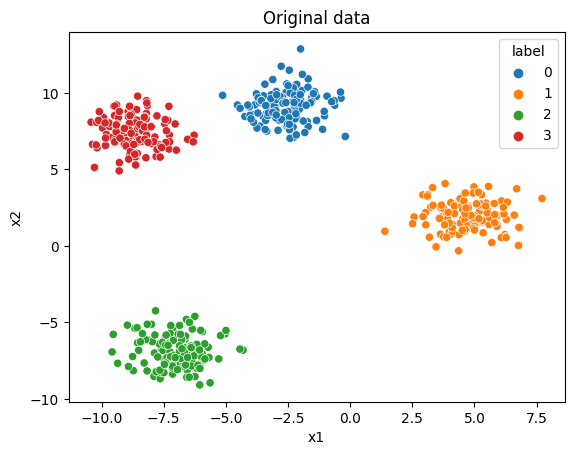

In [25]:
sns.scatterplot(df, x="x1", y="x2", hue="label", palette="tab10")
plt.title('Original data')

Text(0.5, 1.0, 'Original data')

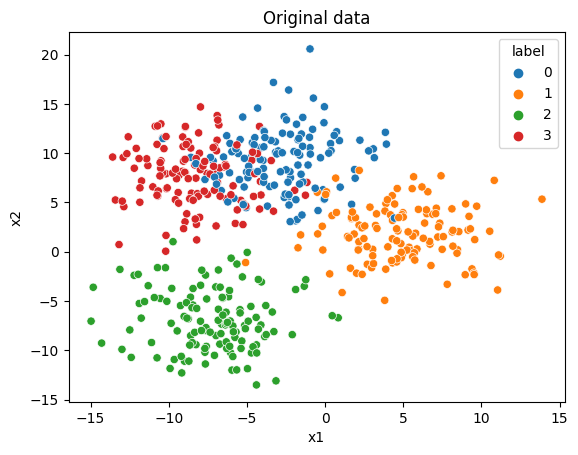

In [27]:
X, y = make_blobs(500, centers=4, random_state=42, cluster_std=3) # increase std

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1","x2","label"]
df["label"] = df["label"].astype(int)

sns.scatterplot(df, x="x1", y="x2", hue="label", palette="tab10")
plt.title('Original data')

In [29]:
X = df.drop("label", axis=1) # remove label as we don't have it in unsupervised learning
X.head()

,x1,x2
0,-5.390508,5.213994
1,-14.970287,-7.042994
2,11.209288,-0.451725
3,-3.685522,4.623741
4,-3.275985,-8.104336


## Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) 

# Why fit transform on entire X? We don't have supervised data, we can't do train | test | spit. Cannot evaluate anything.

scaled_X[:5]

array([[-0.33802676,  0.32130181],
       [-1.94750118, -1.42592745],
       [ 2.45086274, -0.48634439],
       [-0.05157644,  0.23716155],
       [ 0.01722877, -1.57722131]])

Text(0.5, 1.0, 'Scaled X with feature standardization, no labels')

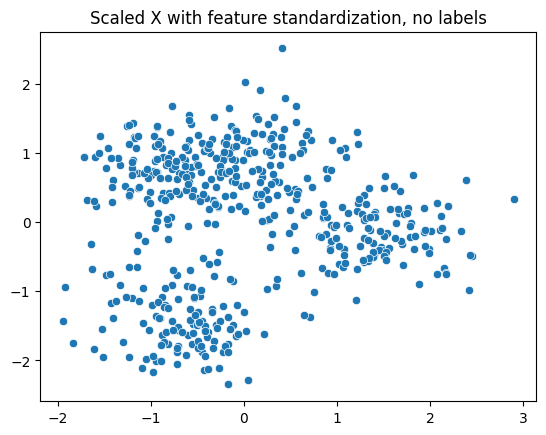

In [32]:
sns.scatterplot(x = scaled_X[:,0], y=scaled_X[:,1])
plt.title('Scaled X with feature standardization, no labels')

## k-means

In [36]:
from sklearn.cluster import KMeans

clusters = range(1,10)
sum_squared_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_squared_distance

[999.9999999999995,
 591.4813839663718,
 248.02179940236354,
 180.2356774592273,
 158.74063865045292,
 138.68448697782554,
 125.7869403945393,
 107.46227258615772,
 99.3575144268599]

Text(0.5, 1.0, 'Elbow plot to find k')

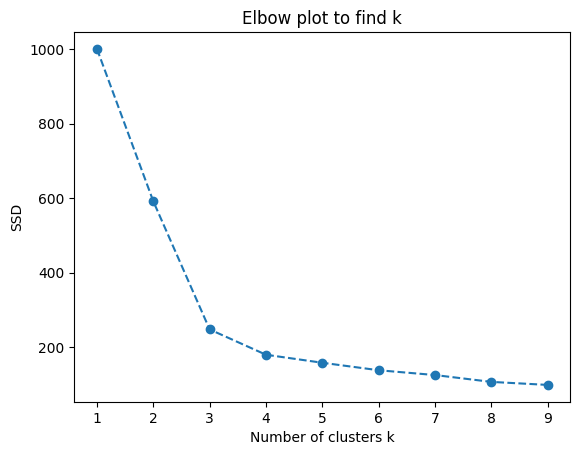

In [37]:
plt.plot(clusters, sum_squared_distance, "--o")
plt.xlabel("Number of clusters k")
plt.ylabel("SSD")
plt.title("Elbow plot to find k")

## Silhouette

Compare different clustering models or numbers of cluster k to determine the optimal number of clusters for a given dataset.

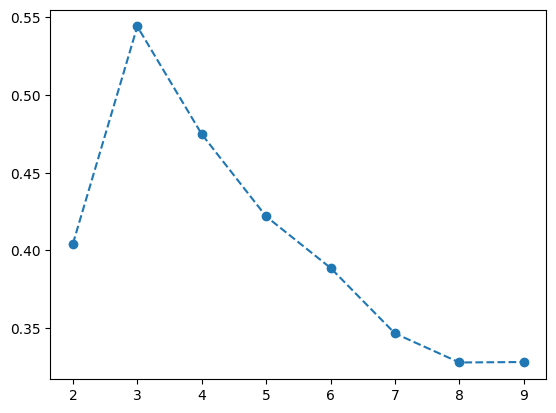

In [38]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "--o")


In [39]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()


,x1,x2
0,-0.338027,0.321302
1,-1.947501,-1.425927
2,2.450863,-0.486344
3,-0.051576,0.237162
4,0.017229,-1.577221


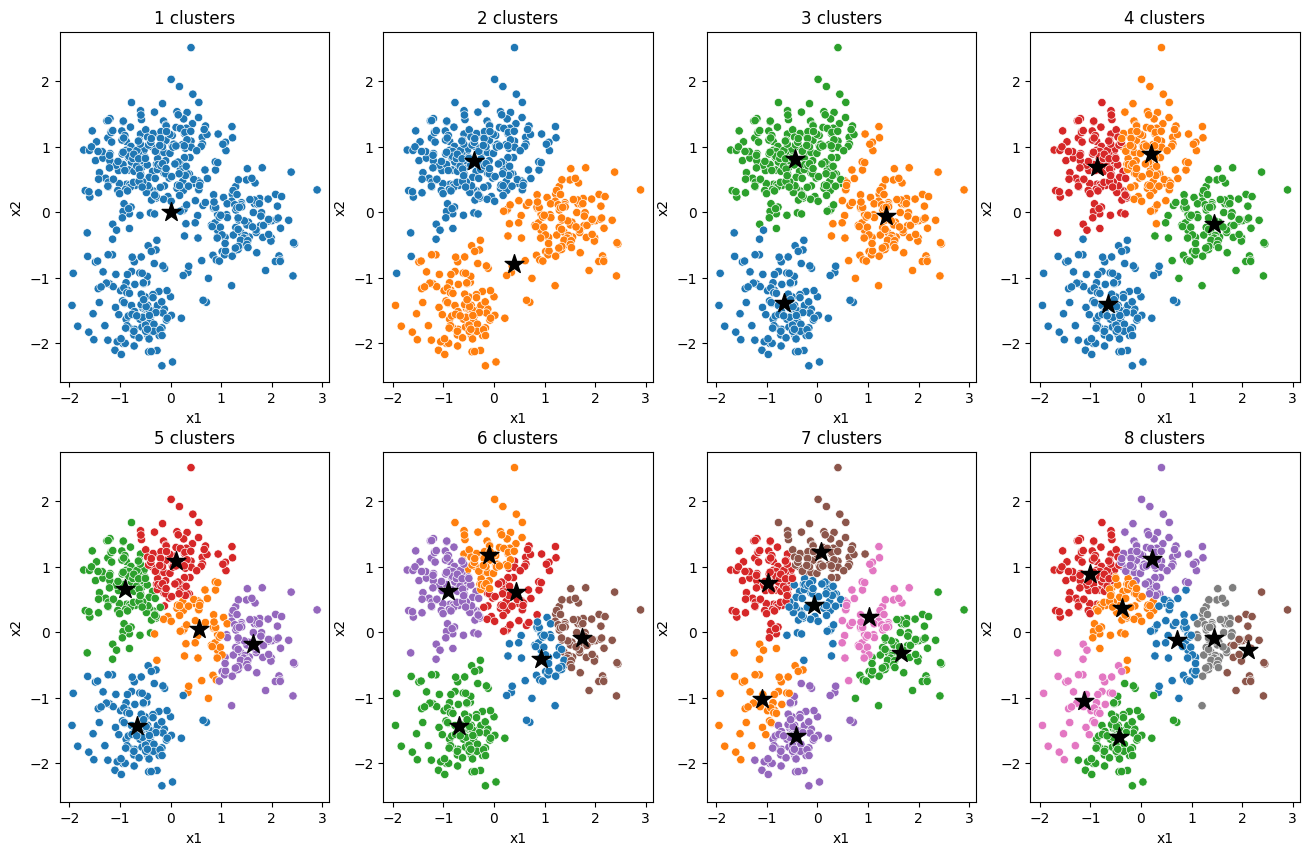

In [42]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black"
    )

    ax.legend([], [], frameon=False)

    ax.set(title = f"{i+1} clusters")
